<a href="https://colab.research.google.com/github/Japleen-16/Analysis-of-Amazon-s-Best-Seller-Books./blob/main/Amazon_best_selling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import pandas as pd
import string 
import re
import numpy as np
import matplotlib.pyplot as plt


Creating the dataframe

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/bestsellers with categories.csv')
df

df.rename(columns={"User Rating": "User_Rating"}, inplace=True)
df[df.Author == 'J. K. Rowling']
df[df.Author == 'J.K. Rowling']
df.loc[df.Author == 'J. K. Rowling', 'Author'] = 'J.K. Rowling'

In [ ]:
df['name_len'] = df['Name'].apply(lambda x: len(x) - x.count(" "))

In [ ]:
punct=string.punctuation
print('list of punctuations : ', punct)

list of punctuations :  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


function to find the percentage of punctuations in a text

In [ ]:
def punct_count(text):
  count=sum(1 for char in text if char in punct)
  return round(count/(len(text)-text.count(" "))*100,3)

In [ ]:
df['Punct%']=df['Name'].apply(lambda x: punct_count(x))
df

Visualizing the books into fiction and non fiction.

In [ ]:
no_dup=df.drop_duplicates('Name')
Diff_genre=no_dup['Genre'].value_counts() # here we are able to get the different kinds genre
Diff_genre



Non Fiction    191
Fiction        160
Name: Genre, dtype: int64

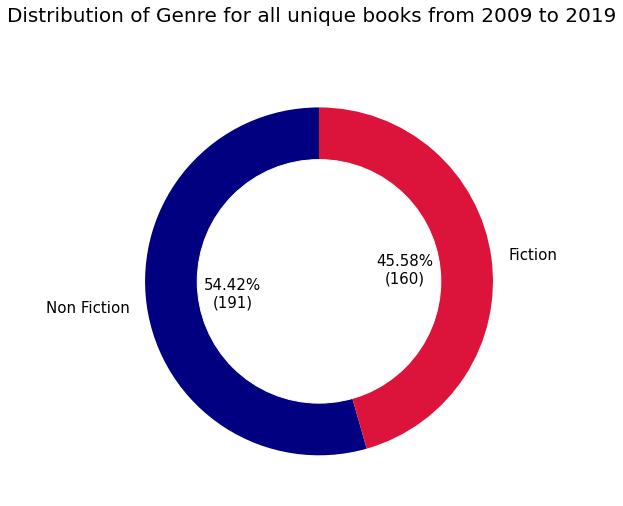

In [ ]:
no_dup = df.drop_duplicates('Name') 
g_count = no_dup['Genre'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)           #the autopct function is being used to calculate the percentage of fiction and non fiction novels.
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

genre_col = ['navy','crimson']
#genre_col = ['khaki','plum']

center_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(x=g_count.values, labels=g_count.index, autopct=make_autopct(g_count.values), 
          startangle=90, textprops={'size': 15}, pctdistance=0.5, colors=genre_col)
ax.add_artist(center_circle)

fig.suptitle('Distribution of Genre for all unique books from 2009 to 2019', fontsize=20)
fig.show()

Visualising top selling authors according to their occurences in top 50 best selling books.

In [ ]:
n_best = 20

top_authors = df.Author.value_counts().nlargest(n_best) #will list out the best top 20 authors with the number of times they occured
no_dup = df.drop_duplicates('Name')
top_authors

Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
Dr. Seuss                              9
Gallup                                 9
Rob Elliott                            8
J.K. Rowling                           8
Eric Carle                             7
Stephen R. Covey                       7
Stephenie Meyer                        7
Dav Pilkey                             7
Bill O'Reilly                          7
Don Miguel Ruiz                        6
E L James                              6
Stieg Larsson                          6
Harper Lee                             6
Sarah Young                            6
The College Board                      6
Name: Author, dtype: int64

Text(0.5, 1.0, 'Unique books')

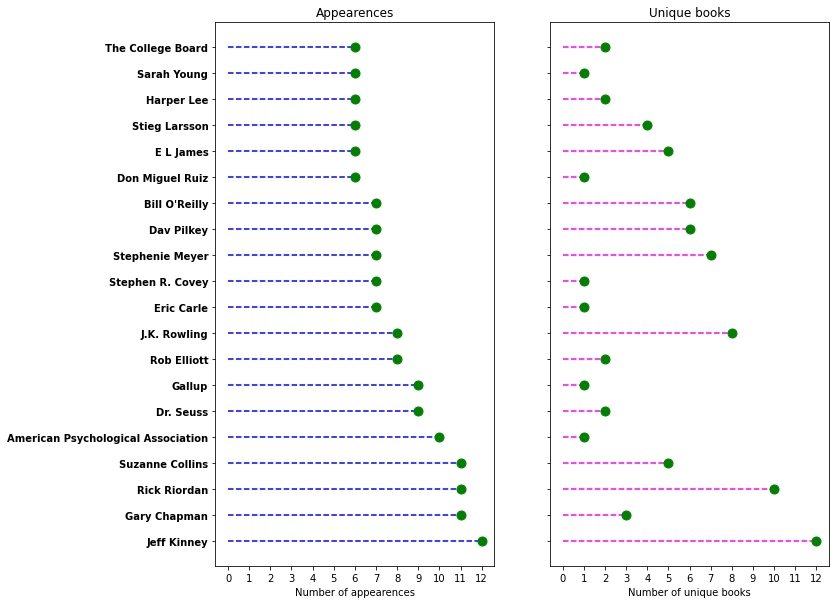

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(11,10), sharey=True)


ax[0].hlines(y=top_authors.index , xmin=0, xmax=top_authors.values, color='blue', linestyles='dashed')  #ax[0] will be having the number of ocuurences
ax[0].plot(top_authors.values, top_authors.index, 'go', markersize=9)
ax[0].set_xlabel('Number of appearences')
ax[0].set_xticks(np.arange(top_authors.values.max()+1))
ax[0].set_yticklabels(top_authors.index, fontweight='semibold')
ax[0].set_title('Appearences')

book_count = []
for name, col in zip(top_authors.index, color):
    book_count.append(len(no_dup[no_dup.Author == name]['Name']))
ax[1].hlines(y=top_authors.index, xmin=0, xmax=book_count, color='magenta', linestyles='dashed')  #ax[1] will be representing the number of unique 
ax[1].plot(book_count, top_authors.index, 'go', markersize=9)                                            #books of that author
ax[1].set_xlabel('Number of unique books')
ax[1].set_xticks(np.arange(max(book_count)+1))
ax[1].set_title('Unique books')                                                                                                       

On observing the patterns, we get to know that Jeff Kinney is the best top selling author with highest occurences and highest number of unique books